<a href="https://www.kaggle.com/code/harshpatel17/task-1?scriptVersionId=111404479" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
applicant_df=pd.read_csv('../input/loanprediction/applicant.csv')
loan_df=pd.read_csv('../input/loanprediction/loan.csv')

In [3]:
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [4]:
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [5]:
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [6]:
applicant_df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

## Data Set applicant_df:

#### 1) Dataset has null values or NaN values
#### 2) Columns such as 'Has_been_employed_for_at_least','Has_been_employed_for_at_most','Savings_account_balance' , Null values will be replaced by the mean or mode value of the column
#### 3) Columns with more than 50% of the null values are being droped, columns like 'Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'

In [7]:
applicant_df['Has_been_employed_for_at_least'].fillna(applicant_df['Has_been_employed_for_at_least'].mode()[0],inplace=True)
applicant_df['Has_been_employed_for_at_most'].fillna(applicant_df['Has_been_employed_for_at_most'].mode()[0],inplace=True)
applicant_df['Savings_account_balance'].fillna(applicant_df['Savings_account_balance'].mode()[0],inplace=True)

In [8]:
applicant_df.drop(columns=['Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'],inplace=True)

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In [10]:
loan_df.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Other_EMI_plans                                814
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

## Data Set loan_df:

#### 1) Dataset has null or NaN values
#### 2) Columns with less than 50% of null value can be replaced by mean or mode value of the columns, and the Columns wih more than 50% of null values should be drop

In [11]:
loan_df['Purpose'].fillna(loan_df['Purpose'].mode()[0],inplace=True)
loan_df['Property'].fillna(loan_df['Property'].mode()[0],inplace=True)

In [12]:
loan_df.drop(columns='Other_EMI_plans',inplace=True)

## Merging both the datasets to get some insights

In [13]:
LoanApplicant=pd.merge(applicant_df,loan_df,left_on='applicant_id',right_on='applicant_id',how='inner')

In [14]:
LoanApplicant.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,4 years,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


In [15]:
LoanApplicant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   applicant_id                                 1000 non-null   int64 
 1   Primary_applicant_age_in_years               1000 non-null   int64 
 2   Gender                                       1000 non-null   object
 3   Marital_status                               1000 non-null   object
 4   Number_of_dependents                         1000 non-null   int64 
 5   Housing                                      1000 non-null   object
 6   Years_at_current_residence                   1000 non-null   int64 
 7   Employment_status                            1000 non-null   object
 8   Has_been_employed_for_at_least               1000 non-null   object
 9   Has_been_employed_for_at_most                1000 non-null   object
 10  Foreign_worke

[Text(0.5, 0, 'Applicant age')]

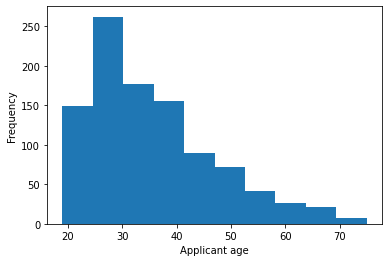

In [16]:
LoanApplicant['Primary_applicant_age_in_years'].plot(kind='hist').set(xlabel='Applicant age')

In [17]:
LoanApplicant.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


### Purpose of applicants to take loan

<AxesSubplot:xlabel='Purpose', ylabel='Frequency of people'>

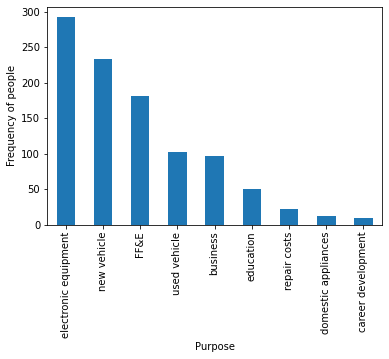

In [18]:
LoanApplicant['Purpose'].value_counts().plot(kind='bar',xlabel='Purpose',ylabel='Frequency of people')

### Type of Saving account balance of Applicants

<AxesSubplot:ylabel='Savings_account_balance'>

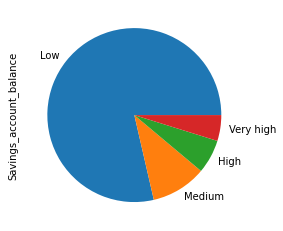

In [19]:
LoanApplicant['Savings_account_balance'].value_counts().plot(kind='pie')

### Correlations of the columns after merge

<AxesSubplot:>

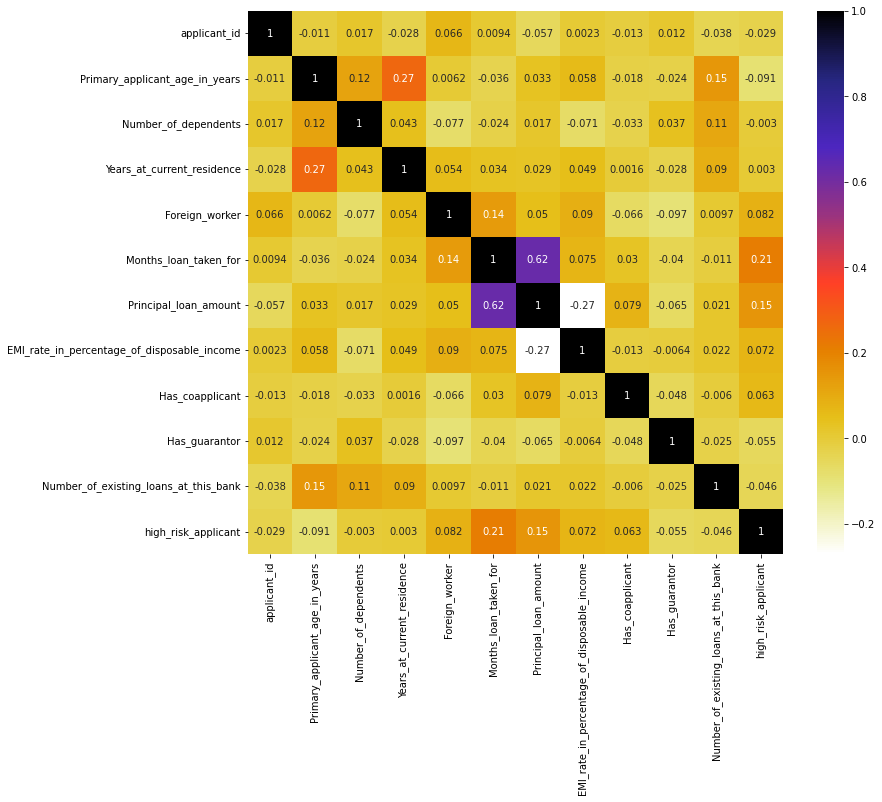

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(LoanApplicant.corr(),annot=True,cmap=plt.cm.CMRmap_r)

#### By the heat map it seems like the column 'Principal_loan_amount' and 'Months_loan_taken_for' are correlated
#### So one of the column should be droped or both the columns can be droped as correlated columns makes the model overfitted 


### Finding correlation with the dependent for the loan application: 'high_risk_applicant'

In [21]:
LoanApplicant.corr()['high_risk_applicant']

applicant_id                                  -0.029125
Primary_applicant_age_in_years                -0.091127
Number_of_dependents                          -0.003015
Years_at_current_residence                     0.002967
Foreign_worker                                 0.082079
Months_loan_taken_for                          0.214927
Principal_loan_amount                          0.154739
EMI_rate_in_percentage_of_disposable_income    0.072404
Has_coapplicant                                0.062728
Has_guarantor                                 -0.055039
Number_of_existing_loans_at_this_bank         -0.045732
high_risk_applicant                            1.000000
Name: high_risk_applicant, dtype: float64

#### Columns having negative correlation with the dependent column should be droped as negative correlation will decrease the trend line

In [22]:
LoanApplicant.drop(columns=['Primary_applicant_age_in_years','Number_of_dependents','Has_guarantor','Number_of_existing_loans_at_this_bank'],inplace=True)

### Analyzing and Visualising Columns having good correlation with the dependent column 

[Text(0.5, 0, 'Period of loan in months')]

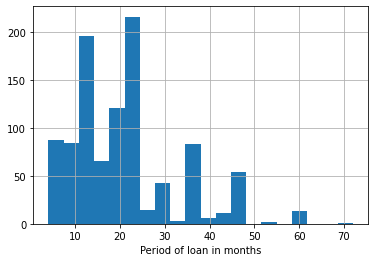

In [23]:
LoanApplicant['Months_loan_taken_for'].hist(bins=20).set(xlabel='Period of loan in months')

#### The above graph of 'Months_loan_taken_for' having a numerical data and it is RIght Skewed 
#### To overcome the skewness, Log function is performed to covert right skewed distrbution to normal distribution

[Text(0.5, 0, 'Period of loan in months')]

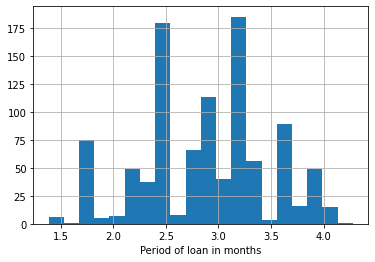

In [24]:
LoanApplicant['Months_loan_taken_for_log']=np.log(LoanApplicant['Months_loan_taken_for'])
LoanApplicant['Months_loan_taken_for_log'].hist(bins=20).set(xlabel='Period of loan in months')

[Text(0.5, 0, 'Total Loan Amount')]

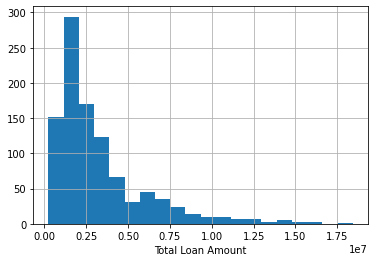

In [25]:
LoanApplicant['Principal_loan_amount'].hist(bins=20).set(xlabel='Total Loan Amount')

#### The above graph of 'Principal_loan_amount' has numerical data and is right skewed
#### To overcome the skewness, Log function is performed to covert right skewed distrbution to normal distribution

[Text(0.5, 0, 'Total Loan Amount')]

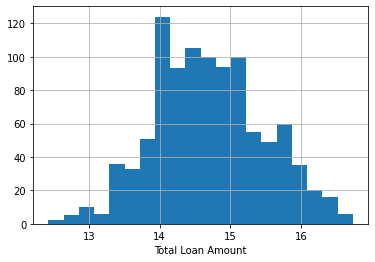

In [26]:
LoanApplicant['Principal_loan_amount']=np.log(LoanApplicant['Principal_loan_amount'])
LoanApplicant['Principal_loan_amount'].hist(bins=20).set(xlabel='Total Loan Amount')